In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('Clicked Ads Dataset.csv')
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


Univariate analysis on age column, daily internet use, and daily time spent on

In [3]:
Uni = ['Age','Daily Internet Usage','Daily Time Spent on Site']

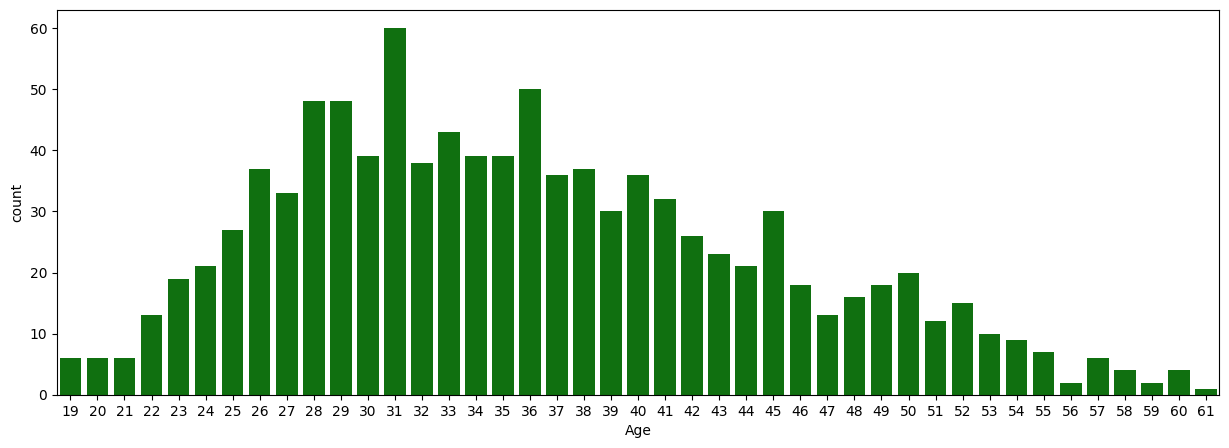

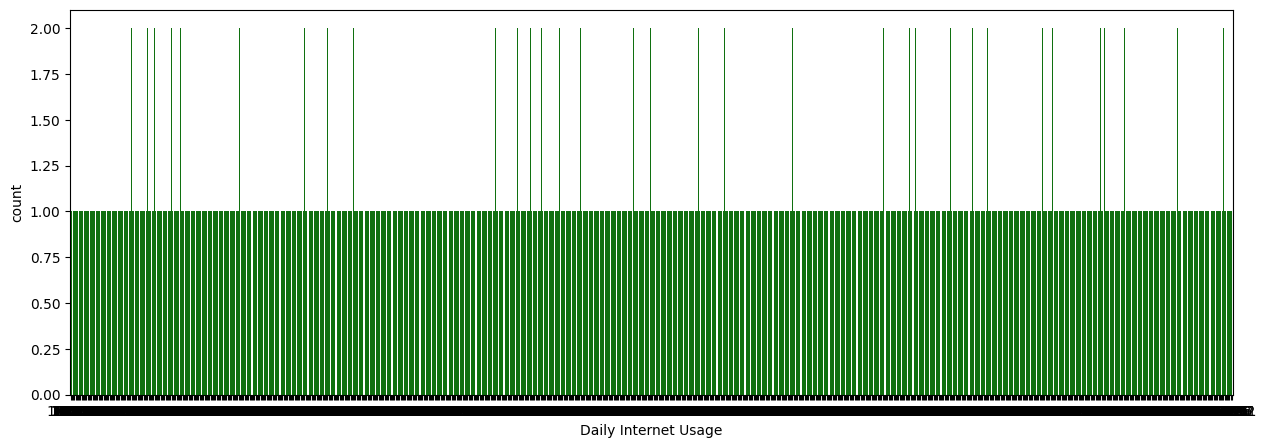

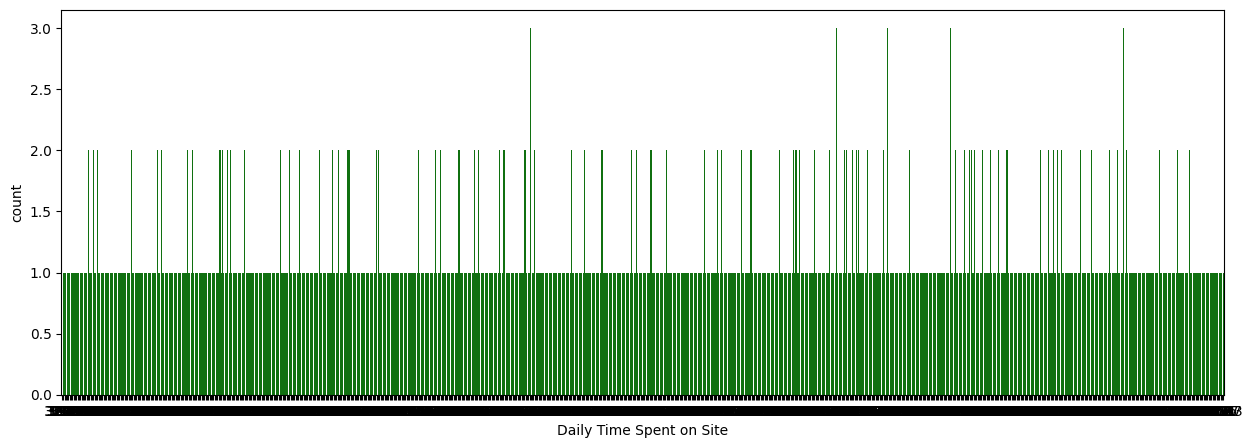

In [4]:
for i in range(len(Uni)):
    plt.figure(figsize=(15,5))
    sns.countplot(x=df[Uni[i]], data=df, color='green')

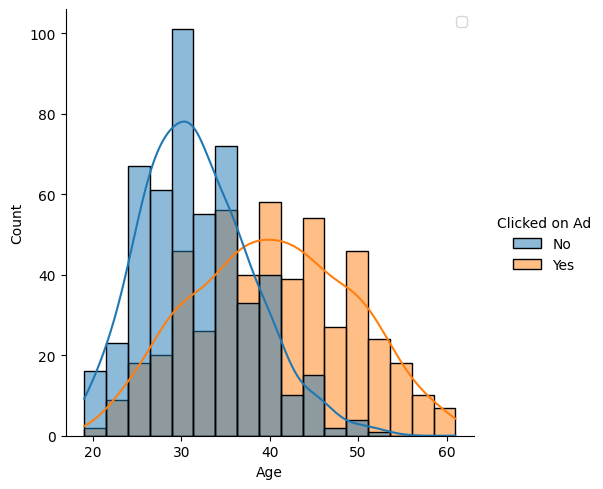

In [5]:
sns.displot(data=df, x="Age", hue="Clicked on Ad", kde=True)
plt.legend()
plt.show()


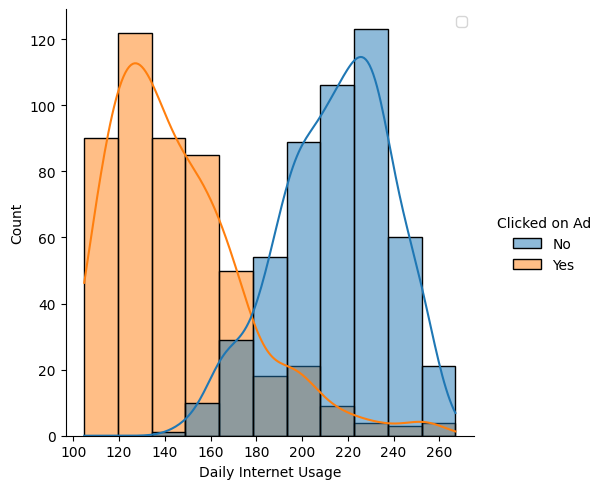

In [6]:
sns.displot(data=df, x="Daily Internet Usage", hue="Clicked on Ad", kde=True)
plt.legend()
plt.show()


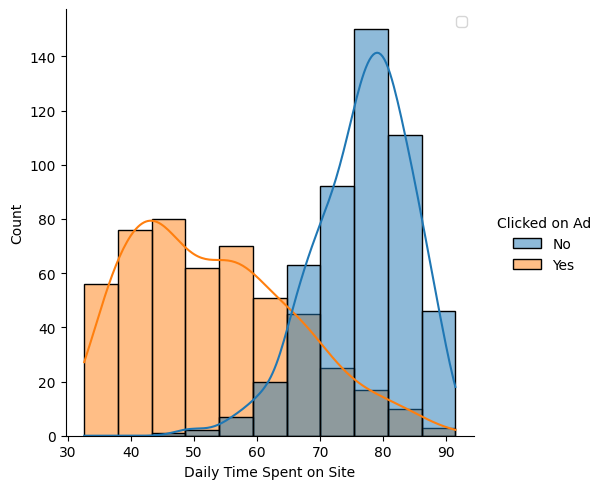

In [7]:
sns.displot(data=df, x="Daily Time Spent on Site", hue="Clicked on Ad", kde=True)
plt.legend()
plt.show()


Bivariate analysis on variables that have been studied in univariate analysis

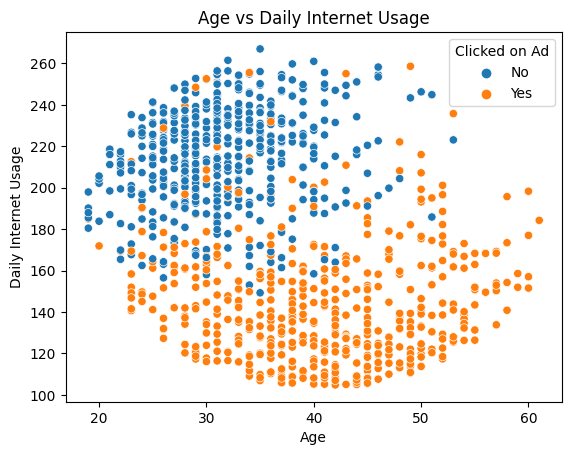

In [8]:
sns.scatterplot(data=df, x='Age', y='Daily Internet Usage', hue='Clicked on Ad')
plt.title('Age vs Daily Internet Usage')
plt.show()

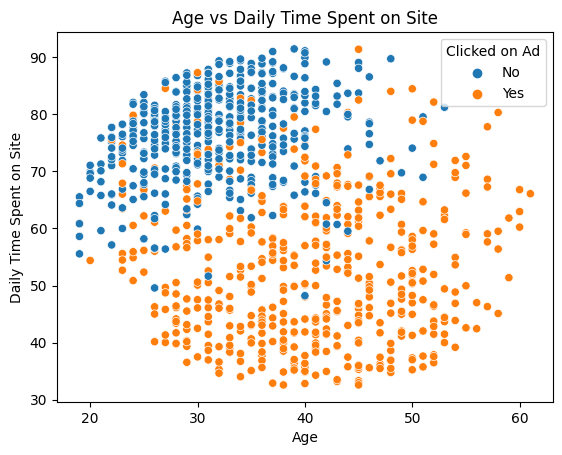

In [9]:
sns.scatterplot(data=df, x='Age', y='Daily Time Spent on Site', hue='Clicked on Ad')
plt.title('Age vs Daily Time Spent on Site')
plt.show()


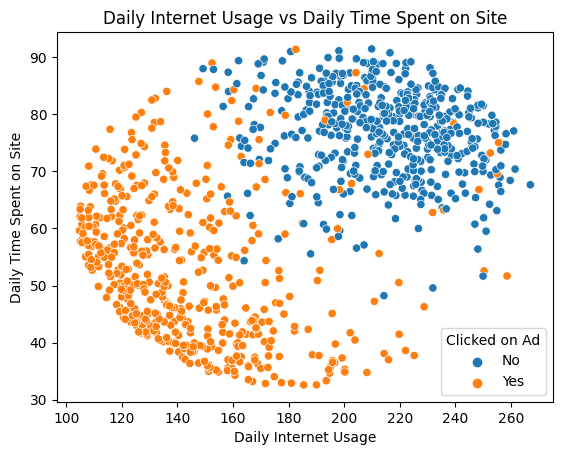

In [10]:
sns.scatterplot(data=df, x='Daily Internet Usage', y='Daily Time Spent on Site', hue='Clicked on Ad')
plt.title('Daily Internet Usage vs Daily Time Spent on Site')
plt.show()

Correlate between columns and perform multivariate analysis

In [11]:
df.corr()

<ipython-input-11-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
Unnamed: 0,1.000000,-0.032637,0.001835,-0.056862,-0.004842
Daily Time Spent on Site,-0.032637,1.000000,-0.331424,0.308266,0.518294
Age,0.001835,-0.331424,1.000000,-0.179343,-0.370481
Area Income,-0.056862,0.308266,-0.179343,1.000000,0.338080
Daily Internet Usage,-0.004842,0.518294,-0.370481,0.338080,1.000000


<ipython-input-12-c1d296a1f2d1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')


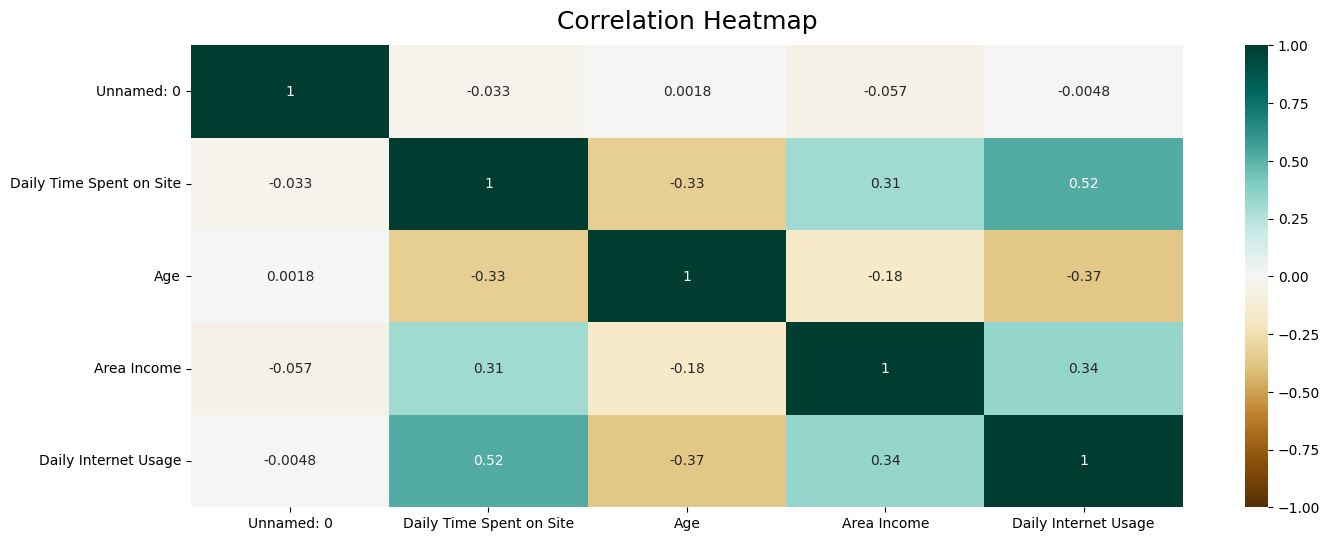

In [12]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')


In [13]:
# Change the data type
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

In [14]:
# rename column
df = df.rename(columns = {'Male' : 'Gender'} )


Clean the dataset from missing values ​​and duplicated values


In [15]:
df.isnull().sum()

Unnamed: 0                   0
Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Gender                       3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

In [16]:
new_df = df.dropna()

In [17]:
new_df.isnull().sum()

Unnamed: 0                  0
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Gender                      0
Timestamp                   0
Clicked on Ad               0
city                        0
province                    0
category                    0
dtype: int64

In [18]:
# check for duplicates of all columns

new_df.duplicated().sum()

0

### Feature encoding on the dataset


In [19]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 963 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                963 non-null    int64         
 1   Daily Time Spent on Site  963 non-null    float64       
 2   Age                       963 non-null    int64         
 3   Area Income               963 non-null    float64       
 4   Daily Internet Usage      963 non-null    float64       
 5   Gender                    963 non-null    object        
 6   Timestamp                 963 non-null    datetime64[ns]
 7   Clicked on Ad             963 non-null    object        
 8   city                      963 non-null    object        
 9   province                  963 non-null    object        
 10  category                  963 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 90.3+ KB


In [20]:
Categorical = ['Gender','Timestamp','Clicked on Ad', 'city' , 'province', 'category']
Numerical = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

In [21]:
df_enc = new_df.copy()
df_encoded = pd.get_dummies(df_enc, columns=Categorical)


df_encoded.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender_Laki-Laki,Gender_Perempuan,Timestamp_2016-01-01 02:52:00,Timestamp_2016-01-01 03:35:00,Timestamp_2016-01-01 05:31:00,...,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
0,0,68.95,35,432837300.0,256.09,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,80.23,31,479092950.0,193.77,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2,69.47,26,418501580.0,236.50,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,3,74.15,29,383643260.0,245.89,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,4,68.37,35,517229930.0,225.58,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### Split data into features and targets

In [22]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['Clicked on Ad_Yes'])
y = df_encoded['Clicked on Ad_Yes']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print("Total training data:", X_train.shape[0])
print("Number of test data:", X_test.shape[0])

Total training data: 770
Number of test data: 193


Extract the column related to time

In [23]:
# year extraction
df_encoded['Tahun'] = df_enc['Timestamp'].dt.year

# Month extraction
df_encoded['Bulan'] = df_enc['Timestamp'].dt.month

# Week extraction
df_encoded['Pekan'] = df_enc['Timestamp'].dt.isocalendar().week

# Day extraction
df_encoded['Hari'] = df_enc['Timestamp'].dt.day
df_encoded

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender_Laki-Laki,Gender_Perempuan,Timestamp_2016-01-01 02:52:00,Timestamp_2016-01-01 03:35:00,Timestamp_2016-01-01 05:31:00,...,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel,Tahun,Bulan,Pekan,Hari
0,0,68.95,35,432837300.0,256.09,0,1,0,0,0,...,0,1,0,0,0,0,2016,3,12,27
1,1,80.23,31,479092950.0,193.77,1,0,0,0,0,...,1,0,0,0,0,0,2016,4,14,4
2,2,69.47,26,418501580.0,236.50,0,1,0,0,0,...,0,0,0,0,0,0,2016,3,10,13
3,3,74.15,29,383643260.0,245.89,1,0,0,0,0,...,0,0,0,1,0,0,2016,1,1,10
4,4,68.37,35,517229930.0,225.58,0,1,0,0,0,...,0,0,0,0,0,0,2016,6,22,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,994,43.70,28,441888720.0,173.01,0,1,0,0,0,...,0,0,0,0,0,0,2016,4,14,4
995,995,72.97,30,499691990.0,208.58,1,0,0,0,0,...,0,0,0,0,0,0,2016,2,6,11
996,996,51.30,45,474475190.0,134.42,1,0,0,0,0,...,0,0,0,0,0,0,2016,4,16,22
998,998,55.55,19,293445530.0,187.95,0,1,0,0,0,...,0,0,0,0,0,0,2016,3,12,24


Share data separately which will later be used as training data and test data

In [24]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['Clicked on Ad_Yes'])
y = df_encoded['Clicked on Ad_Yes']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print("Total training data:", X_train.shape[0])
print("Number of test data:", X_test.shape[0])

Total training data: 770
Number of test data: 193


## Building the Model

### Before Normalization

Logistic Regression

In [25]:
lr = LogisticRegression(C = 1000.0, random_state = 0)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred)))
print('Cohen kappa score: ')
print('{}'.format(cohen_kappa_score(y_test, y_pred)))

Accuracy: 
0.48704663212435234
Classification report: 
              precision    recall  f1-score   support

           0       0.49      1.00      0.66        94
           1       0.00      0.00      0.00        99

    accuracy                           0.49       193
   macro avg       0.24      0.50      0.33       193
weighted avg       0.24      0.49      0.32       193

Confusion Matrix
[[94  0]
 [99  0]]
Cohen kappa score: 
0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest

In [26]:
rfc = RandomForestClassifier(criterion = 'entropy'
                                , n_estimators = 10
                                , random_state = 1
                                , n_jobs = 1)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred)))
print('Cohen kappa score: ')
print('{}'.format(cohen_kappa_score(y_test, y_pred)))



Accuracy: 
0.9844559585492227
Classification report: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        94
           1       1.00      0.97      0.98        99

    accuracy                           0.98       193
   macro avg       0.98      0.98      0.98       193
weighted avg       0.98      0.98      0.98       193

Confusion Matrix
[[94  0]
 [ 3 96]]
Cohen kappa score: 
0.9689160895474311


Support Vector Machines (SVM)

In [27]:
svc = SVC(kernel = 'rbf', C = 1.0, random_state = 0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred)))
print('Cohen kappa score: ')
print('{}'.format(cohen_kappa_score(y_test, y_pred)))

Accuracy: 
0.689119170984456
Classification report: 
              precision    recall  f1-score   support

           0       0.63      0.86      0.73        94
           1       0.80      0.53      0.63        99

    accuracy                           0.69       193
   macro avg       0.72      0.69      0.68       193
weighted avg       0.72      0.69      0.68       193

Confusion Matrix
[[81 13]
 [47 52]]
Cohen kappa score: 
0.38345224150782675


### After Normalization

In [28]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler object
scaler = MinMaxScaler()

# Normalization of training data
X_train_scaled = scaler.fit_transform(X_train)

# Normalization of test data
X_test_scaled = scaler.transform(X_test)

print("X_train without standardising features")
print("--------------------------------------")
print(X_train.loc[1:4, ])  # Using loc for label based indexes

print("")
print("X_train standardising features")
print("--------------------------------------")
print(X_train_scaled[1:5, :])




X_train without standardising features
--------------------------------------
Empty DataFrame
Columns: [Unnamed: 0, Daily Time Spent on Site, Age, Area Income, Daily Internet Usage, Gender_Laki-Laki, Gender_Perempuan, Timestamp_2016-01-01 02:52:00, Timestamp_2016-01-01 03:35:00, Timestamp_2016-01-01 05:31:00, Timestamp_2016-01-01 08:27:00, Timestamp_2016-01-01 15:14:00, Timestamp_2016-01-01 20:17:00, Timestamp_2016-01-01 21:58:00, Timestamp_2016-01-02 04:50:00, Timestamp_2016-01-02 09:30:00, Timestamp_2016-01-02 12:25:00, Timestamp_2016-01-02 14:36:00, Timestamp_2016-01-03 03:22:00, Timestamp_2016-01-03 04:39:00, Timestamp_2016-01-03 05:34:00, Timestamp_2016-01-03 07:13:00, Timestamp_2016-01-03 16:01:00, Timestamp_2016-01-03 16:30:00, Timestamp_2016-01-03 17:10:00, Timestamp_2016-01-03 23:21:00, Timestamp_2016-01-04 00:44:00, Timestamp_2016-01-04 04:00:00, Timestamp_2016-01-04 06:37:00, Timestamp_2016-01-04 07:28:00, Timestamp_2016-01-04 21:48:00, Timestamp_2016-01-04 22:27:00, Timesta

In [29]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler object
sc = StandardScaler()

# Features to be standardized

# Standardize the training data
X_train_standard = sc.fit_transform(X_train_scaled)

# Perform standardization on test data
X_test_standard = sc.transform(X_test)

print("X_train without standardising features")
print("--------------------------------------")
print(X_train.loc[1:4, ])  # Using loc for label based indexes
print("")
print("X_train standardising features")
print("--------------------------------------")
print(X_train_standard[1:5, :])


X_train without standardising features
--------------------------------------
Empty DataFrame
Columns: [Unnamed: 0, Daily Time Spent on Site, Age, Area Income, Daily Internet Usage, Gender_Laki-Laki, Gender_Perempuan, Timestamp_2016-01-01 02:52:00, Timestamp_2016-01-01 03:35:00, Timestamp_2016-01-01 05:31:00, Timestamp_2016-01-01 08:27:00, Timestamp_2016-01-01 15:14:00, Timestamp_2016-01-01 20:17:00, Timestamp_2016-01-01 21:58:00, Timestamp_2016-01-02 04:50:00, Timestamp_2016-01-02 09:30:00, Timestamp_2016-01-02 12:25:00, Timestamp_2016-01-02 14:36:00, Timestamp_2016-01-03 03:22:00, Timestamp_2016-01-03 04:39:00, Timestamp_2016-01-03 05:34:00, Timestamp_2016-01-03 07:13:00, Timestamp_2016-01-03 16:01:00, Timestamp_2016-01-03 16:30:00, Timestamp_2016-01-03 17:10:00, Timestamp_2016-01-03 23:21:00, Timestamp_2016-01-04 00:44:00, Timestamp_2016-01-04 04:00:00, Timestamp_2016-01-04 06:37:00, Timestamp_2016-01-04 07:28:00, Timestamp_2016-01-04 21:48:00, Timestamp_2016-01-04 22:27:00, Timesta

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [30]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Example of training data
example_train_data = np.array([[10], [20], [30]])

# Initialize the scaler object
example_sc = StandardScaler()

# Perform mean and standard deviation calculations on training data
example_sc.fit(example_train_data)

# Perform transformation on training data
example_train_data_scaled = example_sc.transform(example_train_data)

print("Example train data")
print("------------------")
print(example_train_data)
print("Example train data scaled")
print("------------------------")
print(example_train_data_scaled)
print("----------------------------------------------")
print("")
print("What would happen if, instead of scaling the test dataset with the training scaling parameters, we scaled")
print("with the test scaling parameters?")

# Sample test data
example_test_data = np.array([[5], [6], [7]])

# Perform transformation on test data
example_test_data_scaled = example_sc.transform(example_test_data)

print("Example test data")
print("-----------------")
print(example_test_data)
print("Example test data scaled")
print("-----------------------")
print(example_test_data_scaled)


Example train data
------------------
[[10]
 [20]
 [30]]
Example train data scaled
------------------------
[[-1.22474487]
 [ 0.        ]
 [ 1.22474487]]
----------------------------------------------

What would happen if, instead of scaling the test dataset with the training scaling parameters, we scaled
with the test scaling parameters?
Example test data
-----------------
[[5]
 [6]
 [7]]
Example test data scaled
-----------------------
[[-1.83711731]
 [-1.71464282]
 [-1.59216833]]


Logistic Regression

In [31]:
lr = LogisticRegression(C = 1000.0, random_state = 0 )
lr.fit(X_train_standard, y_train)
Y_pred_Logit = lr.predict(X_test_standard)
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, Y_pred_Logit)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, Y_pred_Logit)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, Y_pred_Logit)))
print('Cohen kappa score: ')
print('{}'.format(cohen_kappa_score(y_test, Y_pred_Logit)))



Accuracy: 
0.48704663212435234
Classification report: 
              precision    recall  f1-score   support

           0       0.49      1.00      0.66        94
           1       0.00      0.00      0.00        99

    accuracy                           0.49       193
   macro avg       0.24      0.50      0.33       193
weighted avg       0.24      0.49      0.32       193

Confusion Matrix
[[94  0]
 [99  0]]
Cohen kappa score: 
0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest

In [32]:
rfc = RandomForestClassifier(criterion = 'entropy'
                                , n_estimators = 10
                                , random_state = 1
                                , n_jobs = 1)
rfc.fit(X_train_standard, y_train)
Y_pred_RF = rfc.predict(X_test_standard)
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, Y_pred_RF)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, Y_pred_RF)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, Y_pred_RF)))
print('Cohen kappa score: ')
print('{}'.format(cohen_kappa_score(y_test, Y_pred_RF)))

Accuracy: 
0.9015544041450777
Classification report: 
              precision    recall  f1-score   support

           0       0.89      0.90      0.90        94
           1       0.91      0.90      0.90        99

    accuracy                           0.90       193
   macro avg       0.90      0.90      0.90       193
weighted avg       0.90      0.90      0.90       193

Confusion Matrix
[[85  9]
 [10 89]]
Cohen kappa score: 
0.803029489176559


Support Vector Machines (SVM)

In [33]:
svm = SVC(kernel = 'linear', C = 1.0, random_state = 0)
svm.fit(X_train_standard, y_train)
Y_pred_SVM = svm.predict(X_test_standard)
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, Y_pred_SVM)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, Y_pred_SVM)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, Y_pred_SVM)))
print('Cohen kappa score: ')
print('{}'.format(cohen_kappa_score(y_test, Y_pred_SVM)))

Accuracy: 
0.48704663212435234
Classification report: 
              precision    recall  f1-score   support

           0       0.49      1.00      0.66        94
           1       0.00      0.00      0.00        99

    accuracy                           0.49       193
   macro avg       0.24      0.50      0.33       193
weighted avg       0.24      0.49      0.32       193

Confusion Matrix
[[94  0]
 [99  0]]
Cohen kappa score: 
0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


evaluate the model using the confusion matrix and show features
important from the model results

Logistic Regression

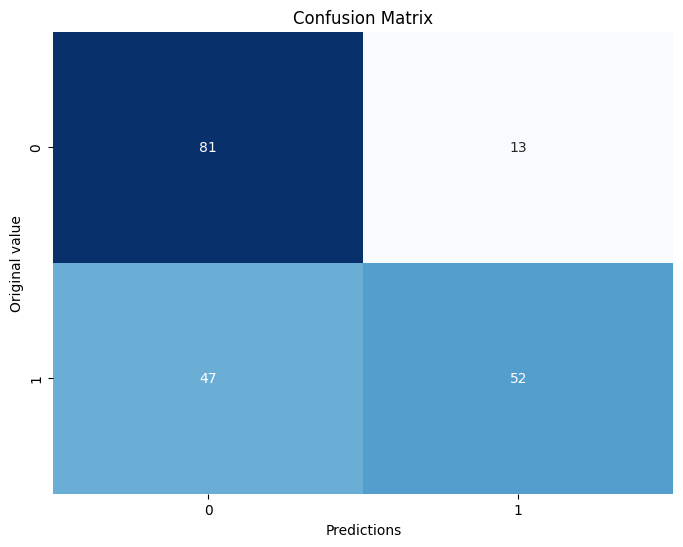

In [34]:
from sklearn.metrics import confusion_matrix
lr = LogisticRegression(C = 1000.0, random_state = 0 )
lr.fit(X_train_standard, y_train)
Y_pred_Logit = lr.predict(X_test_standard)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predictions")
plt.ylabel("Original value")
plt.title("Confusion Matrix")
plt.show()




Random Forest

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


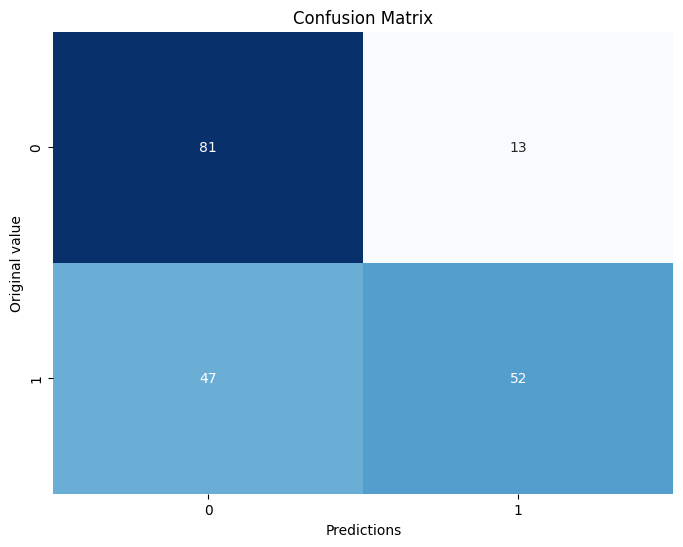

In [35]:
from sklearn.metrics import confusion_matrix
rfc = RandomForestClassifier(criterion = 'entropy'
                                , n_estimators = 10
                                , random_state = 1
                                , n_jobs = 1)
rfc.fit(X_train_standard, y_train)
Y_pred_RF = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predictions")
plt.ylabel("Original value")
plt.title("Confusion Matrix")
plt.show()



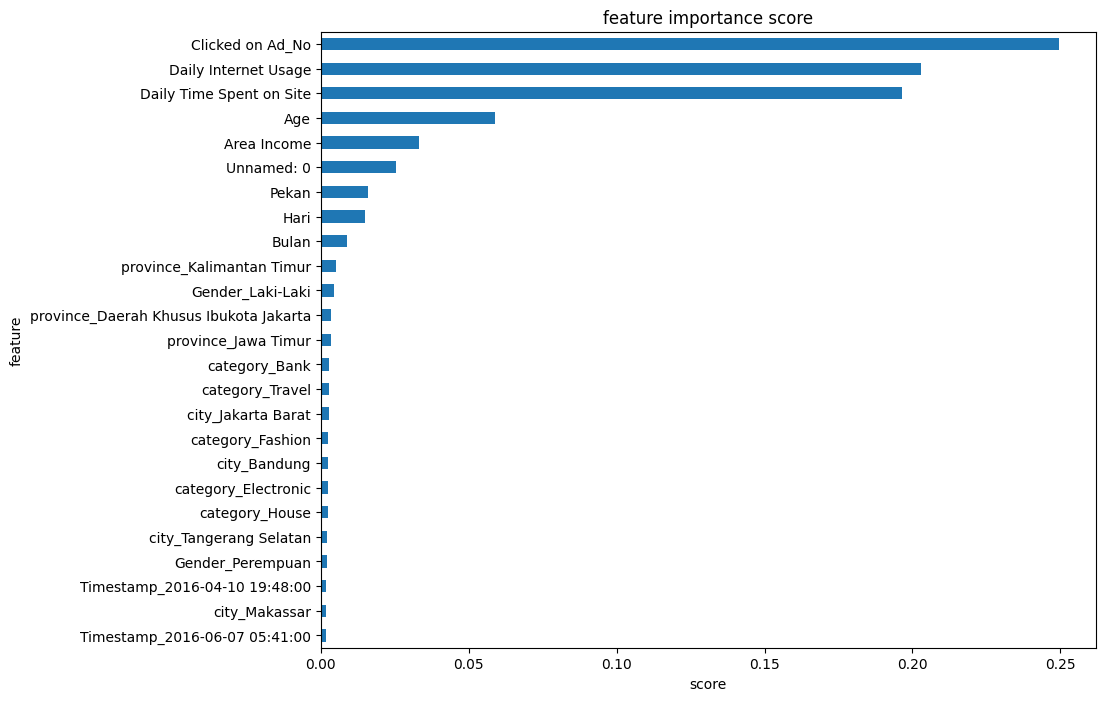

In [36]:
def show_feature_importance(rfc):
    feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind= 'barh', figsize=(10, 8))
    ax.invert_yaxis()


    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

show_feature_importance(rfc)

Support Vector Machines (SVM)

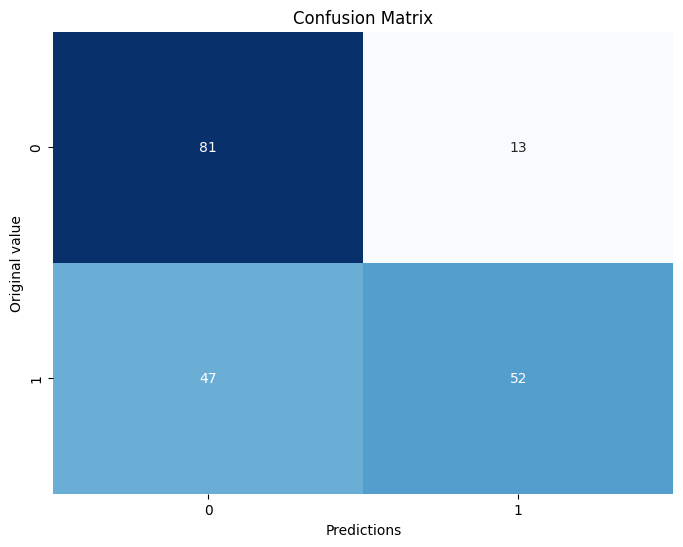

In [37]:
from sklearn.metrics import confusion_matrix
svm = SVC(kernel = 'linear', C = 1.0, random_state = 0)
svm.fit(X_train_standard, y_train)
Y_pred_SVM = svm.predict(X_test_standard)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predictions")
plt.ylabel("Original value")
plt.title("Confusion Matrix")
plt.show()